In [11]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('xAPI-Edu-Data.csv')
# df.shape

# df.isnull().sum()
columns = df.select_dtypes(include=['object']).columns.to_list()
# columns

In [12]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()

In [13]:
def encode_labels(df,labels_to_encode):
    for column in labels_to_encode:
        df[column] = label.fit_transform(df[column])
    return df

In [14]:
print('Shape of dataframe before encoding : ', df.shape)
print('Shape of dataframe after encoding (using dummy encoder) : ',
          pd.get_dummies(df).shape) # this is HUGE!

df_labelled = encode_labels(df,columns)
print('Shape of dataframe after encoding (using label encoder) : ',
          df_labelled.shape)


Shape of dataframe before encoding :  (480, 17)
Shape of dataframe after encoding (using dummy encoder) :  (480, 75)
Shape of dataframe after encoding (using label encoder) :  (480, 17)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X = pd.DataFrame(
sc_X.fit_transform(df_labelled.drop(['Class'], axis = 1))
)
# X.head()
y=df_labelled.Class


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier with k = 5
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7013888888888888


In [18]:
accuracy_rate = []
K_MAX = 35
# Will take some time
for i in range(1,K_MAX):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

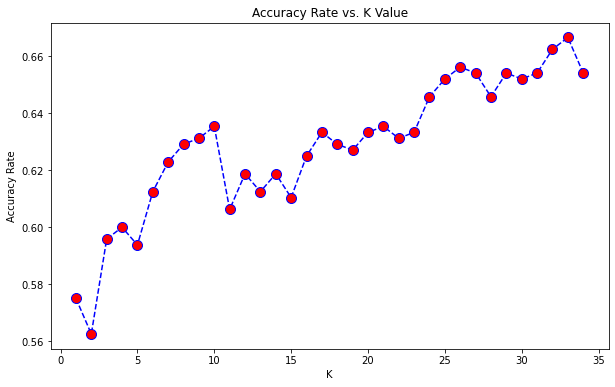

In [19]:
import matplotlib.pyplot as plt
accuracy_rate
plt.figure(figsize=(10,6))
plt.plot(range(1,K_MAX),accuracy_rate,color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


In [20]:
knn = KNeighborsClassifier(n_neighbors=32)
#Predict the response for test dataset
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


In [21]:
columns

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']